In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image
%matplotlib inline

In [4]:
heart = pd.read_csv("heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart.info()
heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
x = np.array(heart['age']).reshape(-1,1) #usia yang mungkin berpenyakit jantung
y = np.array(heart['target']) #1 = berpenyakit jantung #0 = tidak berpenyakit jantung
print(x,y)

[[63]
 [37]
 [41]
 [56]
 [57]
 [57]
 [56]
 [44]
 [52]
 [57]
 [54]
 [48]
 [49]
 [64]
 [58]
 [50]
 [58]
 [66]
 [43]
 [69]
 [59]
 [44]
 [42]
 [61]
 [40]
 [71]
 [59]
 [51]
 [65]
 [53]
 [41]
 [65]
 [44]
 [54]
 [51]
 [46]
 [54]
 [54]
 [65]
 [65]
 [51]
 [48]
 [45]
 [53]
 [39]
 [52]
 [44]
 [47]
 [53]
 [53]
 [51]
 [66]
 [62]
 [44]
 [63]
 [52]
 [48]
 [45]
 [34]
 [57]
 [71]
 [54]
 [52]
 [41]
 [58]
 [35]
 [51]
 [45]
 [44]
 [62]
 [54]
 [51]
 [29]
 [51]
 [43]
 [55]
 [51]
 [59]
 [52]
 [58]
 [41]
 [45]
 [60]
 [52]
 [42]
 [67]
 [68]
 [46]
 [54]
 [58]
 [48]
 [57]
 [52]
 [54]
 [45]
 [53]
 [62]
 [52]
 [43]
 [53]
 [42]
 [59]
 [63]
 [42]
 [50]
 [68]
 [69]
 [45]
 [50]
 [50]
 [64]
 [57]
 [64]
 [43]
 [55]
 [37]
 [41]
 [56]
 [46]
 [46]
 [64]
 [59]
 [41]
 [54]
 [39]
 [34]
 [47]
 [67]
 [52]
 [74]
 [54]
 [49]
 [42]
 [41]
 [41]
 [49]
 [60]
 [62]
 [57]
 [64]
 [51]
 [43]
 [42]
 [67]
 [76]
 [70]
 [44]
 [60]
 [44]
 [42]
 [66]
 [71]
 [64]
 [66]
 [39]
 [58]
 [47]
 [35]
 [58]
 [56]
 [56]
 [55]
 [41]
 [38]
 [38]
 [67]
 [67

In [7]:
model = LogisticRegression(solver="liblinear")
model.fit(x,y)
model.score(x,y)

0.5907590759075908

In [8]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.58      0.38      0.46       138
           1       0.60      0.77      0.67       165

    accuracy                           0.59       303
   macro avg       0.59      0.57      0.56       303
weighted avg       0.59      0.59      0.57       303



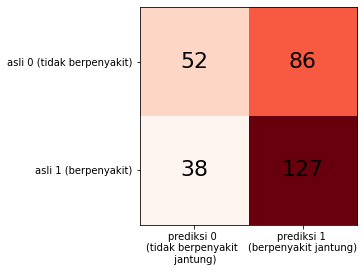

In [9]:
cm = confusion_matrix(y, model.predict(x))

fig,ax = plt.subplots(figsize =(4,4))
ax.imshow(cm, cmap="Reds")

ax.xaxis.set(ticks=(0,1), ticklabels=('prediksi 0 \n(tidak berpenyakit \n jantung)', 'prediksi 1 \n(berpenyakit jantung)'))
ax.yaxis.set(ticks=(0,1), ticklabels=('asli 0 (tidak berpenyakit)', 'asli 1 (berpenyakit)'))

for i in range(2) :
    for j in range(2) :
        ax.text(j, i, cm[i,j],
               ha='center', va='center', color='black',
               fontsize=22)

In [10]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x,y)
model.score(x,y)

0.6402640264026402

Text(0, 0.5, 'Tingkat Akurasi')

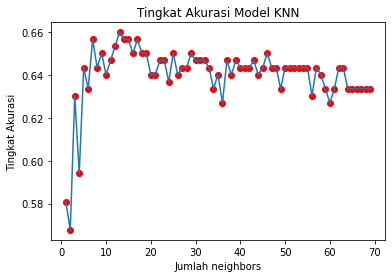

In [11]:
koleksi_score = []
k = range(1,70,1)
for i in k :
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x,y)
    koleksi_score.append(model.score(x,y))
    
plt.plot(k, koleksi_score)
plt.scatter(k, koleksi_score, color="red")

plt.title('Tingkat Akurasi Model KNN')
plt.xlabel('Jumlah neighbors')
plt.ylabel('Tingkat Akurasi')

In [12]:
kolom = heart.columns
kolom

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
nama_indeks = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
indeks = heart[nama_indeks]
target = heart['target']

In [14]:
print(indeks.shape, target.shape)

(303, 13) (303,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(indeks, target,
                                                   test_size=0.3,
                                                   random_state=0)

In [16]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = model_tree.predict(X_test)

y_pred == y_test

225     True
152    False
228    False
201     True
52     False
       ...  
253     True
293    False
76     False
272    False
238     True
Name: target, Length: 91, dtype: bool

In [18]:
print("Akurasi: ", accuracy_score(y_pred, y_test))
print("Classification report")
print(classification_report(y_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred, y_test))

Akurasi:  0.7142857142857143
Classification report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        48
           1       0.68      0.74      0.71        43

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91

Confusion Matrix
[[33 15]
 [11 32]]


In [19]:
import graphviz

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

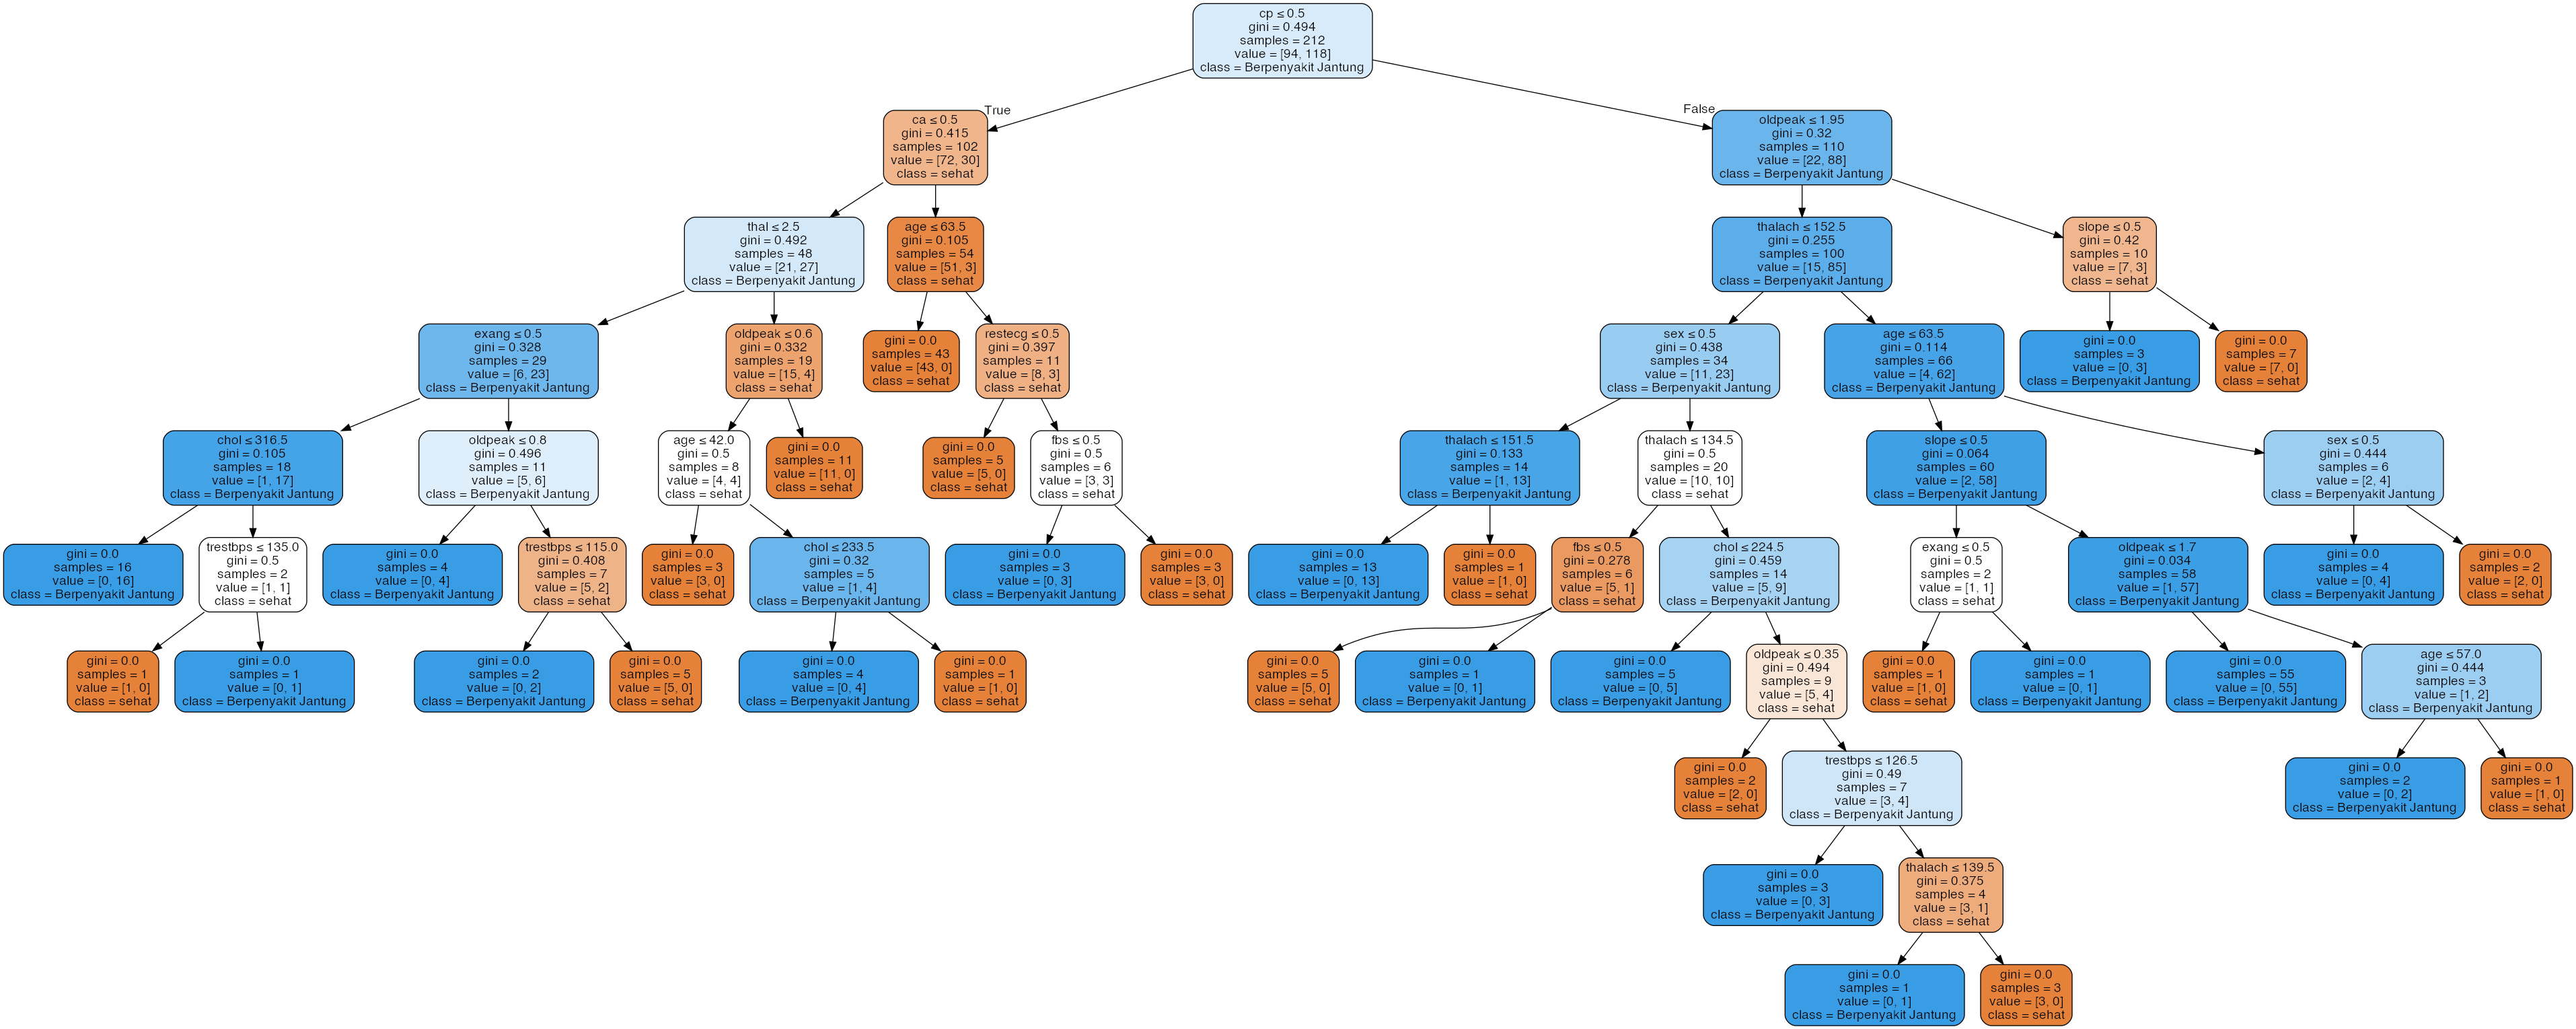

In [21]:
dot_data = StringIO()
tree.export_graphviz(model_tree,
                    out_file=dot_data,
                    class_names=['sehat', 'Berpenyakit Jantung'],
                    feature_names=nama_indeks,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

print("Akurasi: ", accuracy_score(y_pred, y_test))
print("Classification report")
print(classification_report(y_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred, y_test))

Akurasi:  0.8131868131868132
Classification report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91

Confusion Matrix
[[32  5]
 [12 42]]


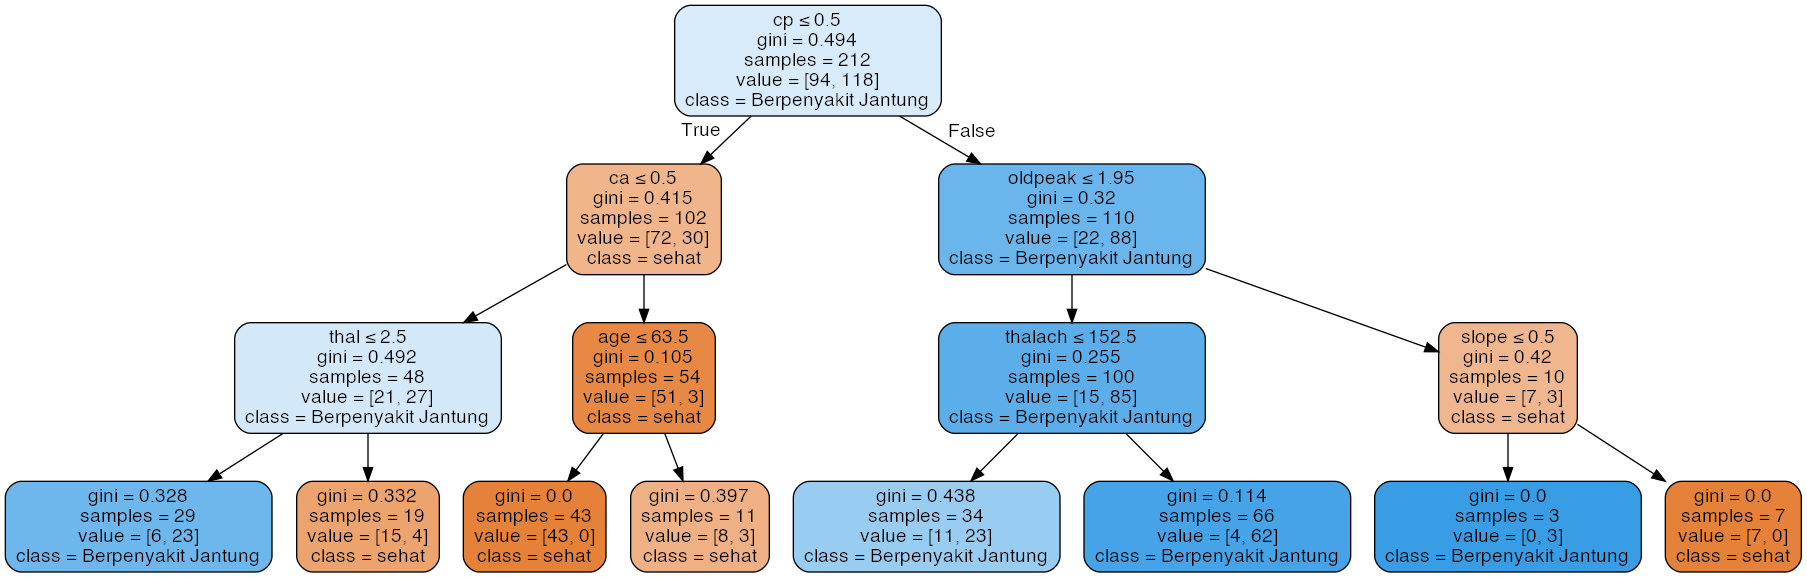

In [23]:
dot_data = StringIO()
tree.export_graphviz(model_tree,
                    out_file=dot_data,
                    class_names=['sehat', 'Berpenyakit Jantung'],
                    feature_names=nama_indeks,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
model_forest = RandomForestClassifier(n_estimators=100)
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model_forest.predict(X_test)

In [34]:
print("Akurasi: ", accuracy_score(y_pred, y_test))
print("Classification report")
print(classification_report(y_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred, y_test))

Akurasi:  0.8131868131868132
Classification report
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.79      0.83        52

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

Confusion Matrix
[[33  6]
 [11 41]]


In [35]:
model_forest.feature_importances_

array([0.0822851 , 0.0417321 , 0.14000281, 0.07218554, 0.07628168,
       0.01108227, 0.01403939, 0.12649764, 0.06397632, 0.10416281,
       0.05314604, 0.11022877, 0.10437954])

In [37]:
df_vis = pd.DataFrame({"index":nama_indeks,
                      "importances levels":model_forest.feature_importances_})

df_vis.sort_values(by="importances levels",
                 ascending=False,
                 inplace=True)
df_vis

,index,importances levels
2,cp,0.140003
7,thalach,0.126498
11,ca,0.110229
12,thal,0.104380
9,oldpeak,0.104163
0,age,0.082285
4,chol,0.076282
3,trestbps,0.072186
8,exang,0.063976
10,slope,0.053146


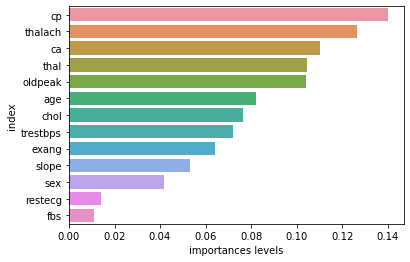

In [39]:
sns.barplot(x=df_vis['importances levels'],
           y=df_vis['index'])

In [47]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

y_pred = model_SVM.predict(X_test)

print("Akurasi: ", accuracy_score(y_pred, y_test))
print("Classification report")
print(classification_report(y_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred, y_test))

Akurasi:  0.8131868131868132
Classification report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91

Confusion Matrix
[[32  5]
 [12 42]]


In [48]:
model_SVM = SVC(kernel='poly')
model_SVM.fit(X_train, y_train)

y_pred = model_SVM.predict(X_test)

print("Akurasi: ", accuracy_score(y_pred, y_test))
print("Classification report")
print(classification_report(y_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred, y_test))

Akurasi:  0.6593406593406593
Classification report
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        27
           1       0.85      0.62      0.72        64

    accuracy                           0.66        91
   macro avg       0.65      0.68      0.64        91
weighted avg       0.73      0.66      0.67        91

Confusion Matrix
[[20  7]
 [24 40]]
